In [17]:
# DATA LOADING

from utils.data_loader.mobility_data_loader import mobility_data_loader

# Process whole dataset into intermediate form
df = mobility_data_loader('20240101','20240101')

1
20240101 dataframe shape
(85653, 18)


In [18]:
import pandas as pd 
# Get tourists common ids
visitors_common_ids_df = pd.read_csv('E:\\IRP_noto_earthquake\\data\\processed\\visitors_common_ids.csv')
visitors_common_ids_df.head()

common_id
0  013db532947b7fba6b2510b30efdb014
1  02d66cff5eee9b4264b507df405d860f
2  043f2bc005bb0005f9bb9a3aa2a94015
3  04dee4fb96e0fa67afe9a60e00e123c4
4  0502a8276ea4e74ee52e342105c9ac1e

In [19]:
visitors_common_ids_df.shape

(391, 1)

In [20]:
df = df['20240101']

In [21]:
# Filter day1 based on common_id in tourists_common_ids_df
df = df[df['common_id'].isin(visitors_common_ids_df['common_id'])]

# Display the filtered DataFrame
print(df.shape)

(1231, 25)


In [26]:
# Mapping and visualize visitors homes

from utils.folium_mapper.ishikawa_region_mapper import ishikawa_region_mapper
from utils.plotter.home_plotter import home_plotter
from utils.plotter.travel_plotter import travel_plotter

map, jpn_adm2 = ishikawa_region_mapper()
map = home_plotter(map, df)
# map = travel_plotter(map,df)
map

In [27]:
import geopandas as gpd
# Replace 'path_to_your_shapefile.shp' with the actual path to your shapefile
jpn_adm2 = gpd.read_file('E:\\IRP_noto_earthquake\\data\\raw\\jpn_adm\\jpn_adm_2019_shp\\jpn_admbnda_adm2_2019.shp')
jpn_adm2.crs = 'EPSG:4326'


# Visitor Dataframe Analysis

In [29]:
df.distance_od.describe()

count    1231.000000
mean       21.537465
std        48.409821
min         0.000000
25%         0.050000
50%         0.850000
75%        20.160000
max       347.660000
Name: distance_od, dtype: float64

## Visitor Evacuation

In [30]:
# Get parent map
from utils.folium_mapper.ishikawa_region_mapper import ishikawa_region_mapper
map, jpn_adm2 = ishikawa_region_mapper()

# Plot shelter
from utils.plotter.shelter_plotter import shelter_plotter
map = shelter_plotter(map)


Former Wajima City Nishiho Elementary School (gymnasium) [37.38261579565501, 136.81424758734263]
Wajima City Kugenosu Community Center [37.3887805593711, 136.9058392770779]
Hotel Route Inn Wajima [37.39597809456971, 136.90518517876185]
Nursing care prevention center facility Fureai Plaza Nisei [37.38663604924676, 136.89569480420437]
Wajima City Oya Community Center [37.38114152151224, 136.88597975188142]
Wajima City Mitsui Community Center [37.31533624424696, 136.90266106890422]
Wajima City Minamishimi Community Center [37.43005269744418, 137.03405593697457]
Wajima City Machino Community Center [37.42333586505611, 137.08810393299623]
Wajima City Kawarada Community Center [37.357284054003365, 136.9083157628509]
Wajima City Urakami Community Center [37.30572509864802, 136.79769779960344]
Wajima City Hongo Community Center [37.284818934685525, 136.826961147374]
Tsurugi Nuclear Disaster Protection Facility [37.231530829269374, 136.71024546346436]
Wajima City Agishi Community Center [37.231

In [31]:
import pandas as pd
from utils.plotter.evacuation_plotter import evacuation_plotter

earthquake_time = pd.to_datetime('2024-01-01 16:10:00')
df_tourists = df[df['depart_time_o'] > earthquake_time]

map = evacuation_plotter(map, df_tourists)
map

## Where are the Tourists From?

In [66]:
df.head()

common_id       mesh_o  latitude_o  longitude_o  \
3079   013db532947b7fba6b2510b30efdb014  56360752321   37.379952   136.903910   
40844  02d66cff5eee9b4264b507df405d860f  55364738321   37.029518   136.978282   
49008  02d66cff5eee9b4264b507df405d860f  55364757113   37.043208   136.963467   
56952  02d66cff5eee9b4264b507df405d860f  55364738321   37.029518   136.978315   
67113  02d66cff5eee9b4264b507df405d860f  55364727444   37.024643   136.974757   

            arrive_time_o  stay_time_o       depart_time_o  move_time mode  \
3079  2024-01-01 01:19:42           18 2024-01-01 01:37:42       2144  car   
40844 2023-12-31 15:38:50         1310 2024-01-01 13:28:55         46  car   
49008 2024-01-01 14:15:26           35 2024-01-01 14:50:40         53  NaN   
56952 2024-01-01 15:43:41           26 2024-01-01 16:09:23         56  car   
67113 2024-01-01 17:05:41           34 2024-01-01 17:39:19         49  car   

            mesh_d  ...      poi_home      poi_work purpose_flg  latitude_h  \
3079   56360761442  ...  5.436750e+10  5.436751e+10           4   36.585958   
40844  55364757113  ...  5.436650e+10  5.436751e+10           5   36.578458   
49008  55364738321  ...  5.436650e+10  5.436751e+10           5   36.578458   
56952  55364727444  ...  5.436650e+10  5.436751e+10           5   36.578458   
67113  55364738214  ...  5.436650e+10  5.436751e+10           5   36.578458   

      longitude_h  latitude_w  longitude_w  distance_oh distance_dh  \
3079   136.626438   36.592542   136.628938    91.663512   92.655842   
40844  136.613813   36.592542   136.628938    59.737256     60.3285   
49008  136.613813   36.592542   136.628938      60.3285   59.738914   
56952  136.613813   36.592542   136.628938    59.738914   59.112282   
67113  136.613813   36.592542   136.628938    59.112282   59.772781   

      distance_od  
3079         1.24  
40844        2.01  
49008        2.01  
56952        0.63  
67113        0.85  

[5 rows x 25 columns]

In [67]:
import folium
from shapely.geometry import Point 
import geopandas as gpd
from utils.folium_mapper.ishikawa_region_mapper import ishikawa_region_mapper

# Get jpn_adm2
jpn_adm2 = gpd.read_file('E:\\IRP_noto_earthquake\\data\\raw\\jpn_adm\\jpn_adm_2019_shp\\jpn_admbnda_adm2_2019.shp')
# Reproject to EPSG:3857 (Web Mercator)
jpn_adm2 = jpn_adm2.to_crs(epsg=3857)



In [68]:
jpn_adm2.head()

ADM0_EN ADM0_JA ADM0_PCODE    ADM1_EN ADM1_JA ADM1_PCODE ADM2_JA  \
0   Japan      日本         JP   Hokkaido     北海道       JP01    えりも町   
1   Japan      日本         JP   Hokkaido     北海道       JP01    せたな町   
2   Japan      日本         JP   Hokkaido     北海道       JP01    ニセコ町   
3   Japan      日本         JP   Hokkaido     北海道       JP01    むかわ町   
4   Japan      日本         JP   Hokkaido     北海道       JP01     七飯町   

       ADM2_EN ADM2_PCODE                                           geometry  
0   Erimo Town    JP01001  POLYGON ((15940936.208 5189516.529, 15941503.4...  
1  Setana Town    JP01002  POLYGON ((15575016.688 5253603.553, 15575470.5...  
2       Niseko    JP01003  POLYGON ((15656954.380 5293354.239, 15657607.6...  
3       Mukawa    JP01004  POLYGON ((15838682.037 5309229.523, 15838676.1...  
4        Nanae    JP01005  POLYGON ((15663052.963 5168592.388, 15663785.7...

In [70]:
# Convert DataFrame to GeoDataFrame with Points geometry
geometry_home = [Point(xy) for xy in zip(df['longitude_h'], df['latitude_h'])]
gdf_home = gpd.GeoDataFrame(df, geometry=geometry_home, crs='EPSG:3857')
# gdf_home.head()
# # Perform spatial join
gdf_home_within_adm = gpd.sjoin(gdf_home, jpn_adm2, how='inner', op='within')
gdf_home_within_adm.head()

e:\IRP_noto_earthquake\.venv\lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Empty GeoDataFrame
Columns: [common_id, mesh_o, latitude_o, longitude_o, arrive_time_o, stay_time_o, depart_time_o, move_time, mode, mesh_d, latitude_d, longitude_d, arrive_time_d, stay_time_d, depart_time_d, poi_home, poi_work, purpose_flg, latitude_h, longitude_h, latitude_w, longitude_w, distance_oh, distance_dh, distance_od, geometry, index_right, ADM0_EN, ADM0_JA, ADM0_PCODE, ADM1_EN, ADM1_JA, ADM1_PCODE, ADM2_JA, ADM2_EN, ADM2_PCODE]
Index: []

[0 rows x 36 columns]

In [65]:
gdf_home_within_adm.shape

(0, 36)

In [54]:
# Assuming gdf_home_within_adm is your GeoDataFrame with home locations and administrative info

# Drop duplicate rows based on 'common_id'
unique_gdf_home_within_adm = gdf_home_within_adm.drop_duplicates(subset=['common_id'])

unique_gdf_home_within_adm.head()

# Print the GeoDataFrame with unique common_id values
unique_gdf_home_within_adm[['common_id', 'geometry', 'ADM1_EN', 'ADM2_EN']].head()


common_id                geometry ADM1_EN  \
3079   013db532947b7fba6b2510b30efdb014  POINT (136.626 36.586)     NaN   
40844  02d66cff5eee9b4264b507df405d860f  POINT (136.614 36.578)     NaN   
17178  043f2bc005bb0005f9bb9a3aa2a94015  POINT (136.641 36.586)     NaN   
6036   04dee4fb96e0fa67afe9a60e00e123c4  POINT (139.865 35.827)     NaN   
67862  0502a8276ea4e74ee52e342105c9ac1e  POINT (135.514 34.703)     NaN   

      ADM2_EN  
3079      NaN  
40844     NaN  
17178     NaN  
6036      NaN  
67862     NaN

In [55]:
unique_gdf_home_within_adm.shape

(431, 36)

In [16]:
import pandas as pd
import plotly.graph_objs as go

# Generate the plotly graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=tourists_df['prefecture'],  # Prefecture names
    y=tourists_df['num_tourists'],  # Number of tourists
    marker=dict(color='purple')
))

# Update layout
fig.update_layout(
    title='Where are the tourists from?',
    xaxis=dict(
        title='Prefecture'
    ),
    yaxis=dict(
        title='Number of Tourists'
    )
)

# Show the figure
fig.show()

(423, 29)

       ADM1_EN  count_common_id_by_ADM1_EN
0        Aichi                          18
1        Akita                           1
2       Aomori                           1
3        Chiba                           7
4        Fukui                           3
5      Fukuoka                           2
6    Fukushima                           1
7         Gifu                           6
8        Gunma                           2
9    Hiroshima                           1
10    Hokkaido                           5
11       Hyōgo                           2
12    Ishikawa                         233
13    Kanagawa                          22
14       Kyoto                           7
15      Miyagi                           1
16      Nagano                           2
17        Nara                           2
18     Niigata                           7
19       Osaka                          23
20        Saga                           1
21     Saitama                           9
22       Sh

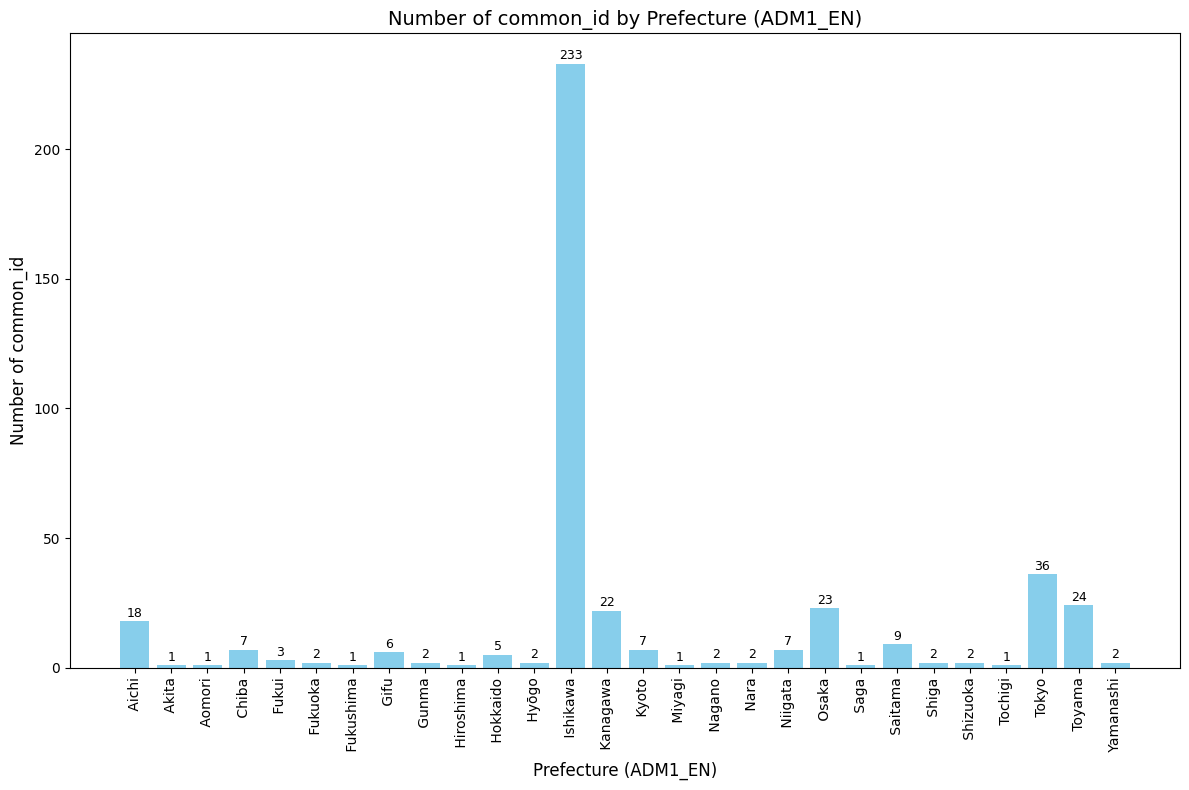

In [18]:
import matplotlib.pyplot as plt

# Data from count_by_ADM1_EN
ADM1_EN = count_by_ADM1_EN['ADM1_EN']
count_common_id = count_by_ADM1_EN['count_common_id_by_ADM1_EN']

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bar chart
bars = ax.bar(ADM1_EN, count_common_id, color='skyblue')

# Adding labels and title
ax.set_xlabel('Prefecture (ADM1_EN)', fontsize=12)
ax.set_ylabel('Number of common_id', fontsize=12)
ax.set_title('Number of common_id by Prefecture (ADM1_EN)', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adding counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


In [19]:
# Count common_id by ADM2_EN (City or District Level)
count_by_ADM2_EN = unique_gdf_home_within_adm.groupby('ADM2_EN')['common_id'].size().reset_index(name='count_common_id_by_ADM2_EN')

# Sort by count_common_id_by_ADM2_EN in descending order
count_by_ADM2_EN_sorted = count_by_ADM2_EN.sort_values(by='count_common_id_by_ADM2_EN', ascending=False)

print(count_by_ADM2_EN_sorted)

            ADM2_EN  count_common_id_by_ADM2_EN
42    Kanazawa City                         145
86    Nonoichi City                          20
20     Hakusan City                          18
77   Nakanoto-machi                          12
39      Kahoku City                          11
..              ...                         ...
50        Kiyota-ku                           1
48   Kishiwada City                           1
47      Kawasaki-ku                           1
46   Kawaguchi City                           1
131   Yokosuka City                           1

[132 rows x 2 columns]


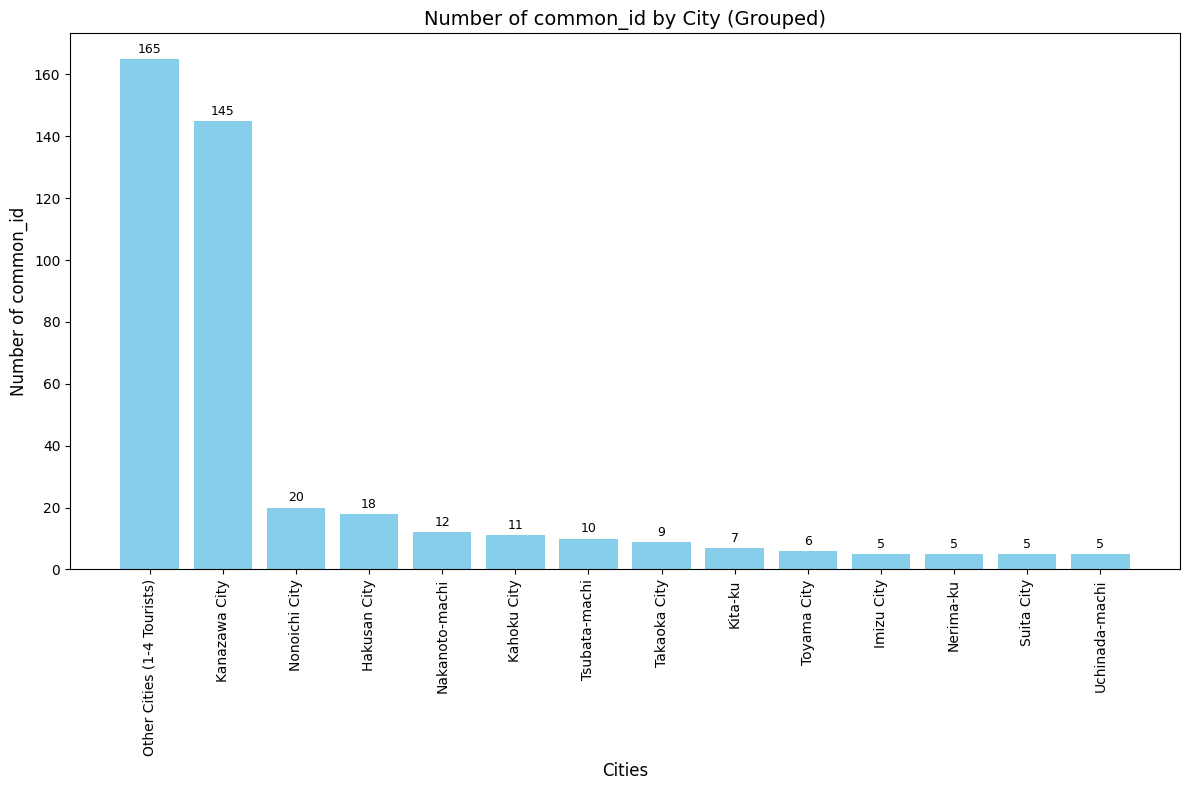

In [20]:
import matplotlib.pyplot as plt

# Group cities with count = 1 into 'Other Cities Each'
threshold = 4  # cities with this count or fewer will be grouped
count_by_ADM2_EN['ADM2_EN_grouped'] = count_by_ADM2_EN.apply(lambda x: x['ADM2_EN'] if x['count_common_id_by_ADM2_EN'] > threshold else 'Other Cities (1-4 Tourists)', axis=1)
grouped_data = count_by_ADM2_EN.groupby('ADM2_EN_grouped')['count_common_id_by_ADM2_EN'].sum().reset_index()

ADM1_EN = count_by_ADM1_EN['ADM1_EN']
count_common_id = count_by_ADM1_EN['count_common_id_by_ADM1_EN']

# Sort grouped data by count_common_id_by_ADM2_EN in descending order for plotting
grouped_data_sorted = grouped_data.sort_values(by='count_common_id_by_ADM2_EN', ascending=False)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(grouped_data_sorted['ADM2_EN_grouped'], grouped_data_sorted['count_common_id_by_ADM2_EN'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Cities', fontsize=12)
ax.set_ylabel('Number of common_id', fontsize=12)
ax.set_title('Number of common_id by City (Grouped)', fontsize=14)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adding counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


In [21]:
tourists_day1.shape

(1228, 18)

In [22]:
tourists_day1.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d       arrive_time_d  stay_time_d  \
14    36.896218   136.795423 2024-01-01 00:51:42          569   
69    37.090278   136.913713 2024-01-01 05:06:34          197   
113   36.984384   136.809174 2024-01-01 00:15:04           23   
269   36.522416   136.894923 2024-01-01 00:32:36          567   
293   37.080059   136.934179 2024-01-01 00:16:16           20   

          depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
14  2024-01-01 10:20:59            1  36.895042  136.788938  36.895125   
69  2024-01-01 08:24:01            4  34.469292  135.405063  34.469292   
113 2024-01-01 00:38:01            5  36.502625  136.613813  36.502625   
269 2024-01-01 09:59:19            6  36.520125  136.888937  36.520125   
293 2024-01-01 00:36:37            2  36.559375  136.641312  36.628458   

    longitude_w  
14   136.788813  
69   135.405063  
113  136.613813  
269  136.888937  
293  136.615188

In [23]:
# Detect stay at night and plot it

In [25]:
# Sort by depart_time_o within each common_id group in descending order
tourists_day1_sorted = tourists_day1.sort_values(by=['common_id', 'depart_time_o'], ascending=[True, False])

# Keep only the first row (latest depart_time_o) for each common_id
tourists_day1_last_travel = tourists_day1_sorted.drop_duplicates(subset='common_id', keep='first')

# Display the result
tourists_day1_last_travel.head()

common_id  latitude_o  longitude_o  \
3079   013db532947b7fba6b2510b30efdb014   37.379952   136.903910   
80065  02d66cff5eee9b4264b507df405d860f   37.024952   136.975197   
6036   04dee4fb96e0fa67afe9a60e00e123c4   37.027608   136.767793   
75372  0502a8276ea4e74ee52e342105c9ac1e   37.028617   136.961383   
72027  0531a2a491d6feaad0d3e5f055eace69   37.049617   136.740096   

            arrive_time_o  stay_time_o       depart_time_o  move_time   mode  \
3079  2024-01-01 01:19:42           18 2024-01-01 01:37:42       2144    car   
80065 2024-01-01 20:30:17           36 2024-01-01 21:05:52        458    car   
6036  2023-12-31 18:02:15          618 2024-01-01 04:20:28       1622    car   
75372 2024-01-01 18:22:03           77 2024-01-01 19:38:46         30  train   
72027 2024-01-01 16:47:07          117 2024-01-01 18:44:35       1127    car   

       latitude_d  longitude_d       arrive_time_d  stay_time_d  \
3079    37.390316   136.898877 2024-01-02 13:22:13           47   
80065   37.024685   136.974285 2024-01-02 04:44:33           50   
6036    37.350679   137.101209 2024-01-02 07:22:49           17   
75372   37.028612   136.961408 2024-01-01 20:09:13          796   
72027   37.048968   136.744466 2024-01-02 13:31:51           43   

            depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
3079  2024-01-02 14:08:48            4  36.585958  136.626438  36.592542   
80065 2024-01-02 05:34:22            5  36.578458  136.613813  36.592542   
6036  2024-01-02 07:39:19            4  35.826792  139.865063  35.826792   
75372 2024-01-02 09:25:31            4  34.702625  135.513813  34.702625   
72027 2024-01-02 14:15:14            4  35.010125  135.715063  35.010125   

      longitude_w  
3079   136.628938  
80065  136.628938  
6036   139.865063  
75372  135.513813  
72027  135.715063

In [26]:
tourists_day1_last_travel.shape

(423, 18)

In [28]:
# Find the maximum depart_time_o in the entire DataFrame
max_depart_time = tourists_day1_last_travel['depart_time_o'].max()

# Display the result
print("Latest depart_time_o value in the whole dataframe:", max_depart_time)

Latest depart_time_o value in the whole dataframe: 2024-01-01 23:56:41


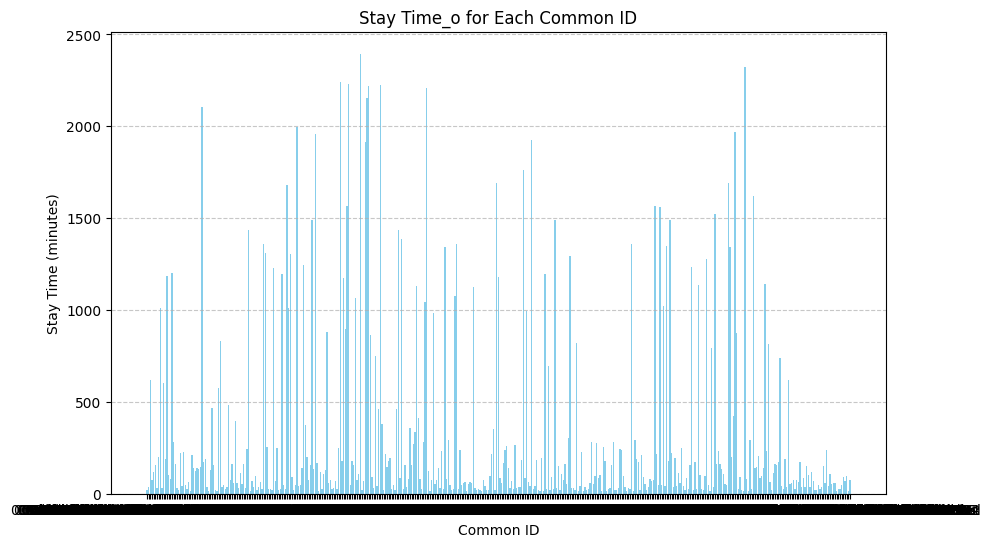

In [30]:
import matplotlib.pyplot as plt
# Plotting stay_time_o
plt.figure(figsize=(10, 6))
plt.bar(tourists_day1_last_travel['common_id'], tourists_day1_last_travel['stay_time_o'], color='skyblue')
plt.xlabel('Common ID')
plt.ylabel('Stay Time (minutes)')
plt.title('Stay Time_o for Each Common ID')
plt.xticks(tourists_day1_last_travel['common_id'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:

# Calculate average stay_time_o
average_stay_time_o = tourists_day1_last_travel['stay_time_o'].mean()

# Display the result
print("Average stay_time_o:", average_stay_time_o)

Average stay_time_o: 322.4775413711584


In [34]:

# Calculate average stay_time_o
max_stay_time_o = tourists_day1_last_travel['stay_time_o'].max()

# Display the result
print("Max stay_time_o:", max_stay_time_o)

Max stay_time_o: 2395


In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tourists_day1_last_travel['stay_time_o'].quantile(0.25)
Q3 = tourists_day1_last_travel['stay_time_o'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = tourists_day1_last_travel[(tourists_day1_last_travel['stay_time_o'] >= lower_bound) & (tourists_day1_last_travel['stay_time_o'] <= upper_bound)]

# Calculate average stay_time_o after removing outliers
average_stay_time_o_filtered = df_filtered['stay_time_o'].mean()

# Display the results
print("Average stay_time_o after removing outliers:", average_stay_time_o_filtered)

Average stay_time_o after removing outliers: 100.26436781609195


In [35]:
checkpoint = tourists_day1_last_travel
# categorize stay hours
bins = [0, 120, 360, 720, 1440, 2880]
labels = ['< 2 hours', '2-6 hours', '6-12 hours', '12-24 hours', '24-48 hours']

# Add a new column with categories based on stay_time_o
checkpoint['stay_category'] = pd.cut(checkpoint['stay_time_o'], bins=bins, labels=labels, right=False)

# Count occurrences in each category
category_counts = checkpoint['stay_category'].value_counts().sort_index()

# Print the results
for category, count in category_counts.items():
    print(f"{category}: {count}")

< 2 hours: 240
2-6 hours: 98
6-12 hours: 15
12-24 hours: 44
24-48 hours: 26


C:\Users\HP\AppData\Local\Temp\ipykernel_12452\1620197835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkpoint['stay_category'] = pd.cut(checkpoint['stay_time_o'], bins=bins, labels=labels, right=False)


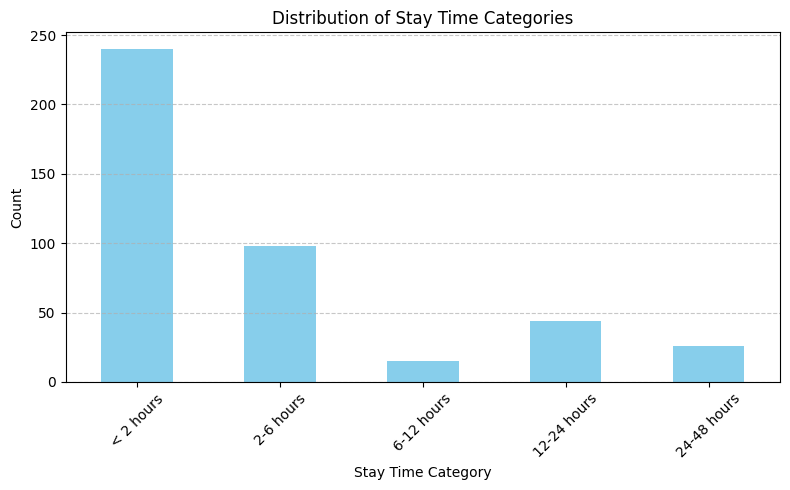

In [36]:

# Plotting
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Stay Time Category')
plt.ylabel('Count')
plt.title('Distribution of Stay Time Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
tourists_day1_last_travel.shape

(423, 19)

In [38]:
map, jpn_adm2 = ishikawa_region_mapper()
map = travel_plotter(map, tourists_day1_last_travel)
map

In [8]:
tourists_day1.head()

common_id  latitude_o  longitude_o  \
14       b42742fc1ea464a3c66a19c4b00ad603   36.896220   136.795218   
69       f0edd6b6f8212254055afccab3e01e7a   37.090284   136.913888   
113  792a4f51-2d56-4aae-928c-2952d820a9b9   36.984389   136.809213   
269      193ece2acc31acf2f2a0bbb3be789655   36.522441   136.894921   
293      ef0b4dd70578af454b85241236309c86   37.079951   136.934149   

          arrive_time_o  stay_time_o       depart_time_o  move_time  mode  \
14  2023-12-31 19:38:05          262 2024-01-01 00:00:11         51   car   
69  2023-12-31 22:03:52          118 2024-01-01 00:01:25        305   car   
113 2023-12-31 23:43:56           19 2024-01-01 00:02:41         12   car   
269 2023-12-31 10:41:27          805 2024-01-01 00:06:09         26   car   
293 2023-12-31 23:16:52           50 2024-01-01 00:06:29          9  walk   

     latitude_d  longitude_d       arrive_time_d  stay_time_d  \
14    36.896218   136.795423 2024-01-01 00:51:42          569   
69    37.090278   136.913713 2024-01-01 05:06:34          197   
113   36.984384   136.809174 2024-01-01 00:15:04           23   
269   36.522416   136.894923 2024-01-01 00:32:36          567   
293   37.080059   136.934179 2024-01-01 00:16:16           20   

          depart_time_d  purpose_flg latitude_h longitude_h latitude_w  \
14  2024-01-01 10:20:59            1  36.895042  136.788938  36.895125   
69  2024-01-01 08:24:01            4  34.469292  135.405063  34.469292   
113 2024-01-01 00:38:01            5  36.502625  136.613813  36.502625   
269 2024-01-01 09:59:19            6  36.520125  136.888937  36.520125   
293 2024-01-01 00:36:37            2  36.559375  136.641312  36.628458   

    longitude_w  
14   136.788813  
69   135.405063  
113  136.613813  
269  136.888937  
293  136.615188

In [9]:
tourists_day1.shape

(1228, 18)

In [10]:
import pandas as pd
import plotly.express as px

# Initialize an empty list to store data for animation
animation_data = []

# Iterate through each row (each travel)
for index, row in tourists_day1.iterrows():
    # Extract relevant details
    start_time = row['arrive_time_o']
    end_time = row['depart_time_o']
    origin_lat = row['latitude_o']
    origin_lon = row['longitude_o']
    dest_lat = row['latitude_d']
    dest_lon = row['longitude_d']
    
    # Create a timestamp range for each hour of travel
    hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')
    
    # Append data for each hour to animation_data
    for timestamp in hourly_range:
        animation_data.append({
            'timestamp': timestamp,
            'origin_lat': origin_lat,
            'origin_lon': origin_lon,
            'dest_lat': dest_lat,
            'dest_lon': dest_lon
        })

# Convert animation_data to DataFrame
animation_df = pd.DataFrame(animation_data)

C:\Users\HP\AppData\Local\Temp\ipykernel_20852\4213427855.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')


In [1]:
# Return date